## **Interactive 3D Plots with Examples**

In [12]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv("auto_clean.csv")

In [14]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

# **3D Scatter Plot**

<IPython.core.display.Javascript object>


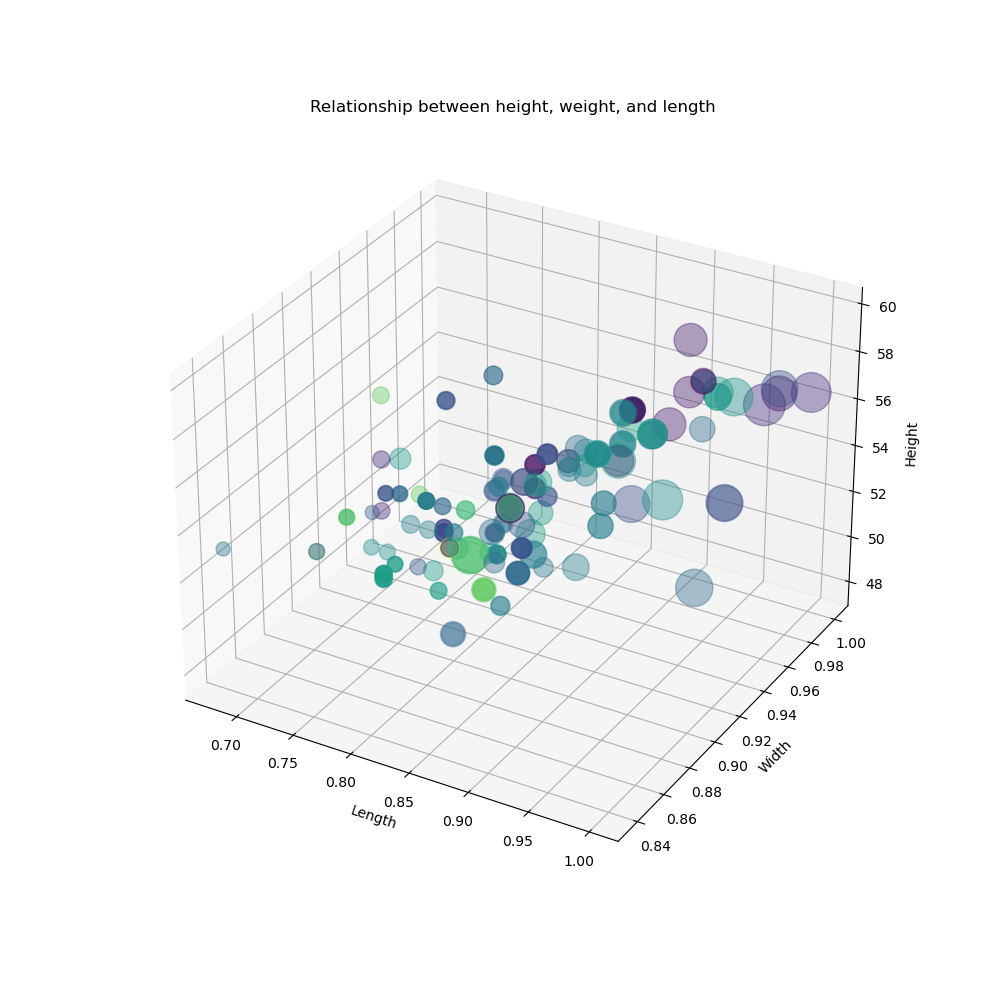

In [15]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")
ax.scatter3D(df['length'], df['width'], df['height'], 
             c = df['peak-rpm'], s = df['price']/50, alpha = 0.4)
ax.set_xlabel("Length")
ax.set_ylabel("Width")
ax.set_zlabel("Height")
ax.set_title("Relationship between height, weight, and length")
plt.show()

# **3D Bar Plot**

In [16]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [17]:
df['body_style1'] = df['body-style'].replace({"convertible": 1,
                                             "hatchback": 2,
                                             "sedan": 3,
                                             "wagon": 4,
                                             "hardtop": 5})

In [18]:
gr = df.groupby("body_style1")['peak-rpm', 'price'].agg('mean')

<IPython.core.display.Javascript object>


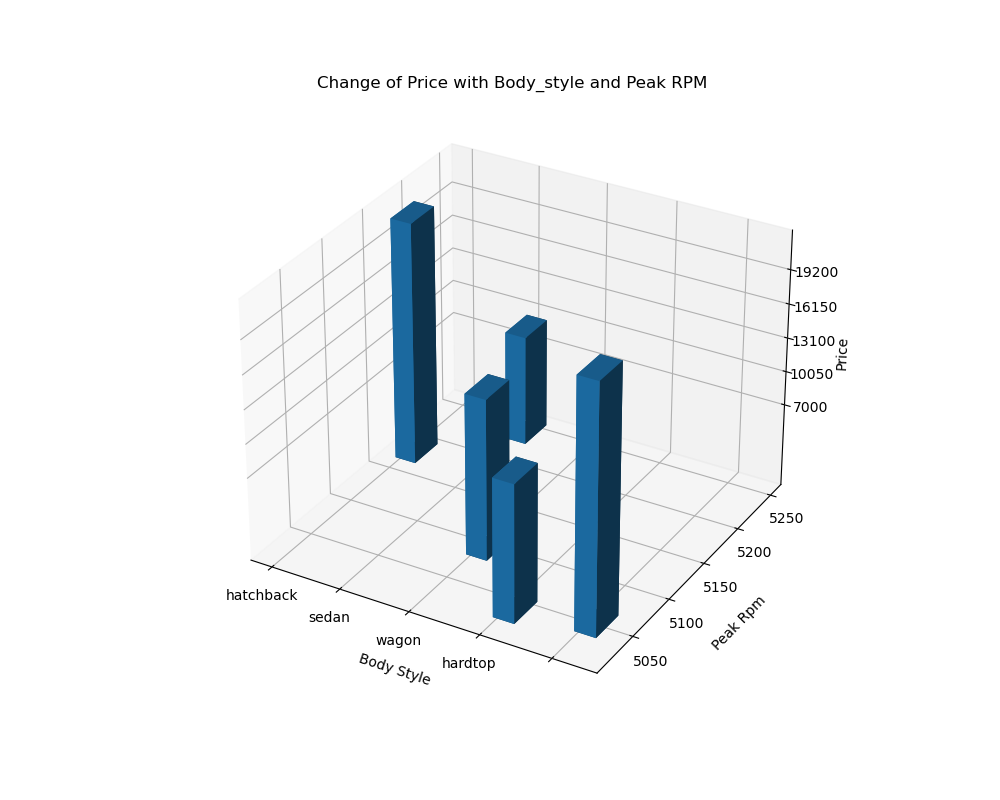

In [19]:
%matplotlib notebook
x = gr.index
y = gr['peak-rpm']
z = [0]*5
colors = ["b", "g", "crimson", 'r', 'pink']
dx = 0.3 * np.ones_like(z)
dy = [30]*5
dz = gr['price']
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.set_xticklabels(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'])
ax.set_xlabel("Body Style", labelpad = 7)
ax.set_yticks(np.linspace(5000, 5250, 6))
ax.set_ylabel("Peak Rpm", labelpad=10)
ax.set_zlabel("Price")
ax.set_zticks(np.linspace(7000, 22250, 6))
ax.set_title("Change of Price with Body_style and Peak RPM")
ax.bar3d(x, y, z, dx, dy, dz)

# **Surface Plot**

<IPython.core.display.Javascript object>


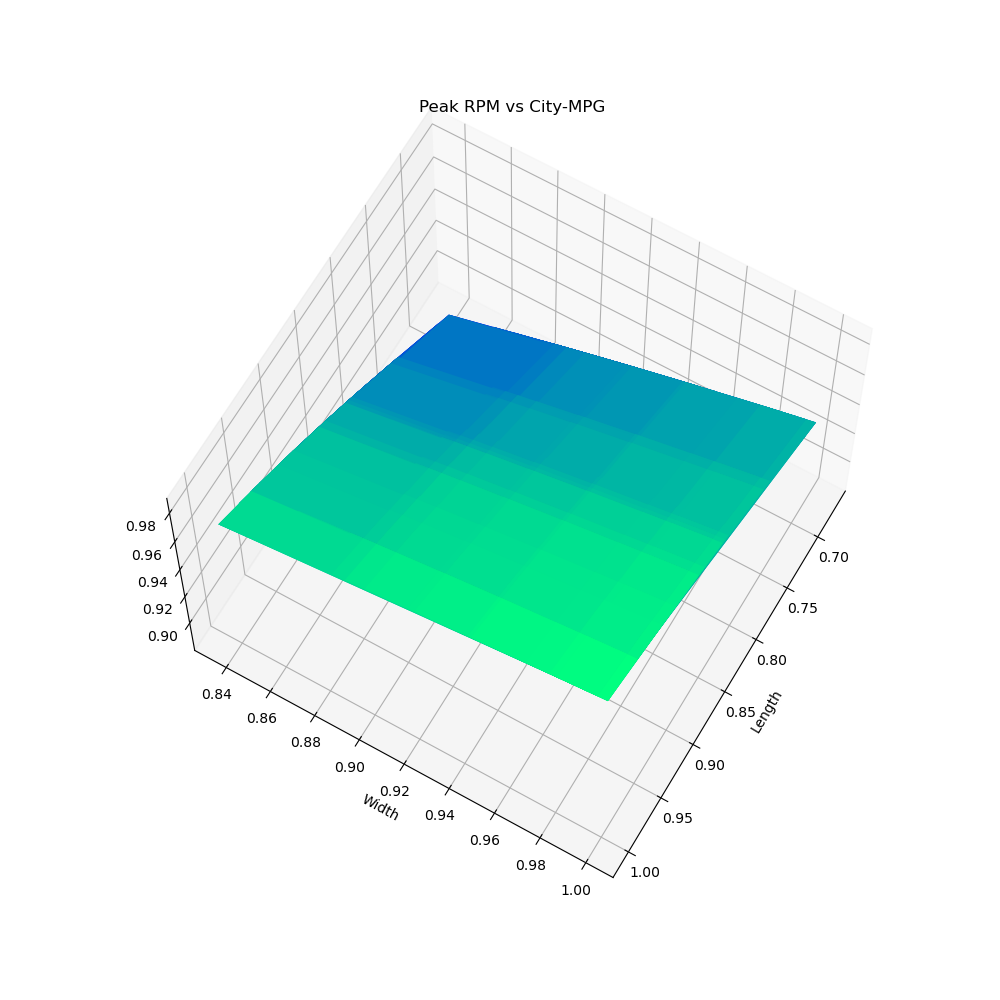

In [20]:
def z_function(x, y):
    return np.sin(np.sqrt(x**2 + y**2))
plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")
x = df['length']
y = df['width']
X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
               cmap='winter', edgecolor='none')
ax.set_xlabel("Length")
ax.set_ylabel("Width")
ax.set_title("Peak RPM vs City-MPG")
ax.view_init(65, 30)

# **Contour Plot**

<IPython.core.display.Javascript object>


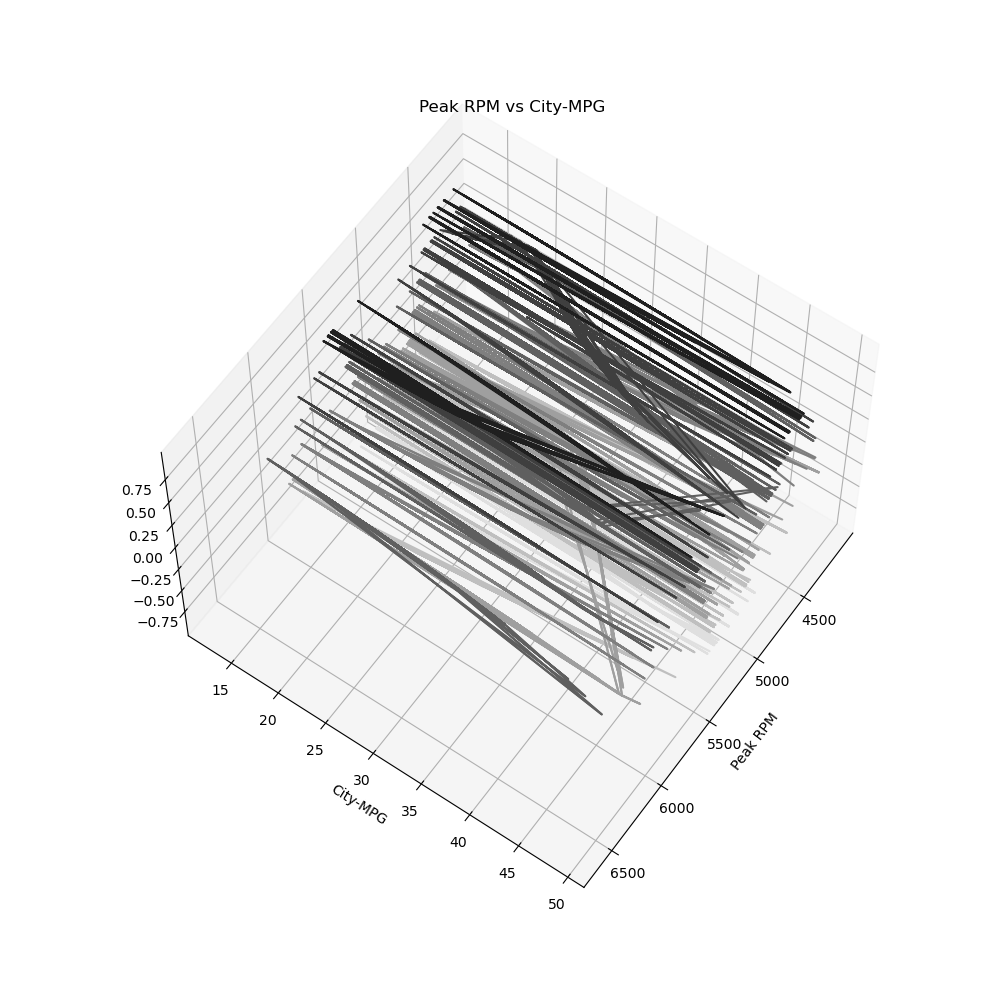

In [21]:
%matplotlib notebook
def z_function(x, y):
    return np.sin(np.sqrt(x**2 + y**2))
plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")
x = df['peak-rpm']
y = df['city-mpg']
X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)
ax.contour3D(X, Y, Z, rstride=1, cstride=1,
               cmap='binary', edgecolor='none')
ax.set_xlabel("Peak RPM")
ax.set_ylabel("City-MPG")
ax.set_title("Peak RPM vs City-MPG")
ax.view_init(60, 35)
plt.show()

# **Tri-Surf Plot**

<IPython.core.display.Javascript object>


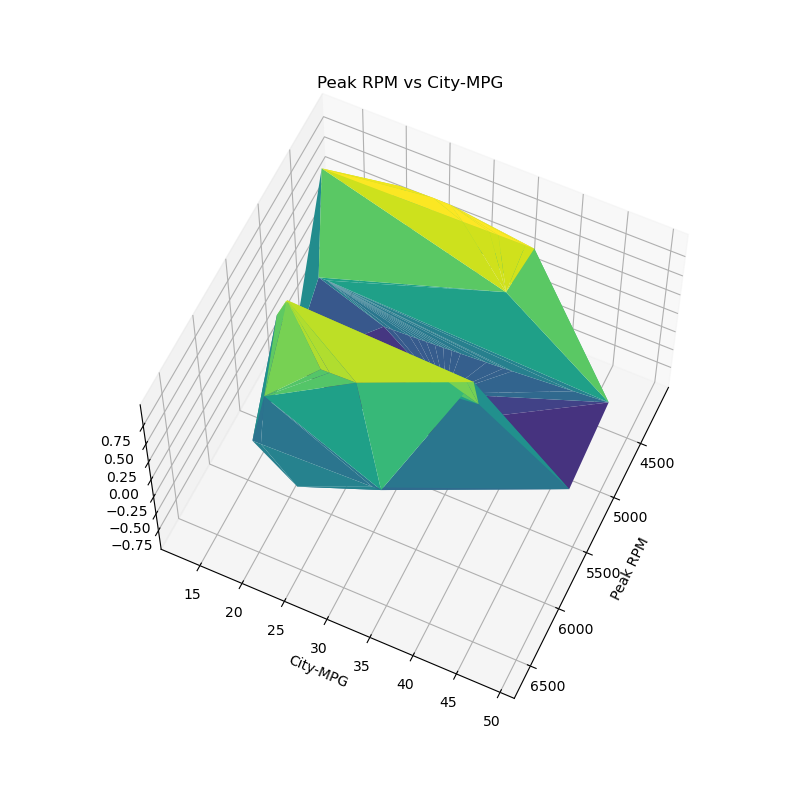

In [22]:
%matplotlib notebook
plt.figure(figsize=(8, 8))
ax = plt.axes(projection="3d")
x = df['peak-rpm']
y = df['city-mpg']
z = z_function(x, y)
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');
ax.set_xlabel("Peak RPM")
ax.set_ylabel("City-MPG")
ax.set_title("Peak RPM vs City-MPG")
ax.view_init(60, 25)
plt.show()